# Compare mPFC activations for incorrect > correct across trial types 

In [3]:
from glob import glob
from scipy import stats
from math import sqrt
import nibabel as nb
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_palette('muted')

#20 subjects - 15 did not have necesssary contrasts
sids = ['783126','783127','783130','783131','783132','783133','783135','783136','783137','783138', 
        '783139','783144','783146','783148','783149','783150','783152','783153','783155','783158']
proj_dir = '/home/data/madlab/data/mri/seqtrd' 
mask_filenames = []
cope_files = []
for SID in sids:
    subjmasks = glob(proj_dir + '/mask/cortical_rois/{0}/anat_masks/_subject_id_{0}/*'.format(SID))
    mask_filenames.append(sorted(subjmasks))
    subjcopes = glob(proj_dir + '/scndlvl/seq_1stpos_cic_FINAL/' + SID
                     + '/seq_1stpos_cic_bl/fixedfx/cope*.nii.gz')
    cope_files.append(sorted(subjcopes))   
    if len(mask_filenames[-1]) == 0 or len(mask_filenames[-1]) != 24:
        print(SID)

783126
783127


## Cell to double-check the array indexing

In [4]:
test_sub = 0
for i, curr_mask in enumerate(mask_filenames[test_sub]):
    print(i, mask_filenames[test_sub][i].split('/')[-1][:-7])

(0, 'cerebellum_bimask_warped')
(1, 'l_ant_hpc_warped')
(2, 'l_cerebellum_bimask_warped')
(3, 'lh-angular-gyrus_fs_warped')
(4, 'lh-caudate_warped')
(5, 'lh-motor_fs_warped')
(6, 'lh-pcc_fs_warped')
(7, 'lh-precuneus_fs_warped')
(8, 'lh-superiortemporalctx_warped')
(9, 'lh_hpc_warped')
(10, 'lh_mpfc_warped')
(11, 'limbicthal_bin_trans_warped')
(12, 'r_ant_hpc_warped')
(13, 'r_cerebellum_bimask_warped')
(14, 'rh-angular-gyrus_fs_warped')
(15, 'rh-caudate_warped')
(16, 'rh-motor_fs_warped')
(17, 'rh-pcc_fs_warped')
(18, 'rh-precuneus_fs_warped')
(19, 'rh-superiortemporalctx_warped')
(20, 'rh_hpc_warped')
(21, 'rh_mpfc_warped')
(22, 'seq_bold_r01_dtype_despike_roi')
(23, 'x_bihemi_mpfc_warped')
(24, 'x_combined_antHC_mPFC_mask')


In [5]:
for i, curr_cope in enumerate(cope_files[1]):
    print(i, cope_files[1][i].split('/')[-1][5:-7]) 

(0, 'InseqCorr_minus_InseqIncorr')
(1, 'InseqCorr_minus_OTCorr')
(2, 'InseqCorr_minus_OTIncorr')
(3, 'InseqCorr_minus_OutseqCorr')
(4, 'InseqCorr_minus_RepeatCorr')
(5, 'InseqCorr_minus_RepeatIncorr')
(6, 'InseqCorr_minus_SkipCorr')
(7, 'InseqCorr_minus_SkipIncorr')
(8, 'InseqIncorr_minus_InseqCorr')
(9, 'InseqIncorr_minus_OutseqIncorr')
(10, 'OTCorr_minu_InseqCorr')
(11, 'OTCorr_minus_OTIncorr')
(12, 'OTIncorr_minus_InseqCorr')
(13, 'OTIncorr_minus_OTCorr')
(14, 'OutseqCorr_minus_InseqCorr')
(15, 'OutseqIncorr_minus_InseqIncorr')
(16, 'RepeatCorr_minu_InseqCorr')
(17, 'RepeatCorr_minus_RepeatIncorr')
(18, 'RepeatIncorr_minus_InseqCorr')
(19, 'RepeatIncorr_minus_RepeatCorr')
(20, 'SkipCorr_minu_InseqCorr')
(21, 'SkipCorr_minus_SkipIncorr')
(22, 'SkipIncorr_minus_InseqCorr')
(23, 'inseq_corr')
(24, 'inseq_incorr')
(25, 'ot_corr')
(26, 'ot_incorr')
(27, 'repeat_corr')
(28, 'repeat_incorr')
(29, 'skipIncorr_minus_SkipCorr')
(30, 'skip_corr')
(31, 'skip_incorr')


### Use binarized mask to obtain activation in left & right hemisphere for each region of interest

In [6]:
mpfc_trials = {"inseq":[], "ot":[], "skip":[], "repeat":[]}
hpc_trials = {"inseq":[], "ot":[], "skip":[], "repeat":[]}
                     
for i in range(len(sids)):
    lh_mpfc_img = nb.load(mask_filenames[i][10])
    rh_mpfc_img = nb.load(mask_filenames[i][21])
    lh_hpc_img = nb.load(mask_filenames[i][1])
    rh_hpc_img = nb.load(mask_filenames[i][12])
    
    inseq_img = nb.load(cope_files[i][8])
    ot_img = nb.load(cope_files[i][13])
    repeat_img = nb.load(cope_files[i][19])
    skip_img = nb.load(cope_files[i][29])
 
    for d in ['inseq', 'ot', 'repeat', 'skip']:
        for r in ['hpc', 'mpfc']:
            lh_data = eval('{0}_img.get_data()[lh_{1}_img.get_data() > 0.]'.format(d,r))   
            rh_data = eval('{0}_img.get_data()[rh_{1}_img.get_data() > 0.]'.format(d,r))
            bihemi_data = np.concatenate((lh_data, rh_data))
            eval('{1}_trials["{0}"].append(np.mean(bihemi_data))'.format(d,r))
                                
mpfc_trials_df = pd.DataFrame(mpfc_trials)
hpc_trials_df = pd.DataFrame(hpc_trials)  

In [7]:
mpfc_trials_df

,inseq,ot,repeat,skip
0,1.322996,2.793470,-0.218787,0.910522
1,0.447292,0.426257,-0.224109,0.527409
2,1.176502,1.812114,-1.139274,2.216021
3,1.072991,5.675395,-0.543310,0.681327
4,-2.339415,1.615722,-0.144830,0.954804
5,0.511317,3.946411,3.823656,1.508878
6,0.760651,1.051018,-2.961540,-0.420773
7,-0.399163,1.614957,-0.280520,-1.147109
8,0.055142,0.080602,-0.203816,1.055518
9,-1.760649,0.850430,1.206359,2.959211


# mPFC

Mean inseq:  0.18200744446367026
STD inseq:  1.20354325852727
Shapiro's Test of Normality: (0.9379110336303711, 0.21888020634651184)
--------
Mean ot:  1.06926854737103
STD ot:  1.7565972265112297
Shapiro's Test of Normality: (0.95887291431427, 0.5215865969657898)
--------
Mean repeat:  0.24325420409440995
STD repeat:  1.512651408639495
Shapiro's Test of Normality: (0.9553058743476868, 0.4548211991786957)
--------
Mean skip:  0.6123271226882935
STD skip:  0.9957149491280229
Shapiro's Test of Normality: (0.9731857776641846, 0.8202086687088013)
--------
Normal Dist -- paired-samples t-test
OT vs. Inseq Ttest_relResult(statistic=2.3358490093301563, pvalue=0.030612316042259183) *
OT vs. Repeat Ttest_relResult(statistic=1.8065590824224436, pvalue=0.0866963254989416)
OT vs. Skip Ttest_relResult(statistic=1.1809124231660937, pvalue=0.25220974400960705)


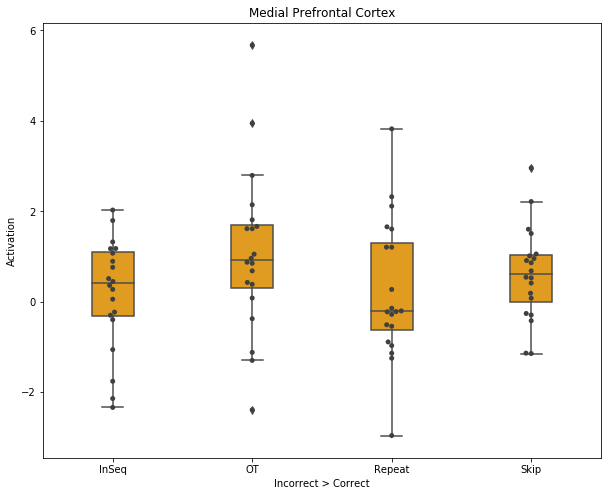

In [8]:
for key in mpfc_trials_df:
    print "Mean {0}: ".format(key), np.mean(mpfc_trials_df['{0}'.format(key)])
    print "STD {0}: ".format(key), np.std(mpfc_trials_df['{0}'.format(key)])
    print "Shapiro's Test of Normality:", stats.shapiro(mpfc_trials_df['{0}'.format(key)])
    print "--------"
print "Normal Dist -- paired-samples t-test"    
print "OT vs. Inseq", stats.ttest_rel(mpfc_trials_df['ot'], mpfc_trials_df['inseq']), "*"
print "OT vs. Repeat", stats.ttest_rel(mpfc_trials_df['ot'], mpfc_trials_df['repeat'])
print "OT vs. Skip", stats.ttest_rel(mpfc_trials_df['ot'], mpfc_trials_df['skip'])
N = 4
conditions = ['InSeq', 'OT', 'Repeat', 'Skip']
mpfc_allsubjs = [mpfc_trials_df['inseq'], mpfc_trials_df['ot'], 
                 mpfc_trials_df['repeat'], mpfc_trials_df['skip']]
ind = np.arange(N)
fig, ax = plt.subplots(figsize = (10,8))
ax0 = sns.boxplot(data = mpfc_allsubjs, color = "orange", width = 0.3)
ax2 = sns.swarmplot(data = mpfc_allsubjs, color='.25')
ax.set_xticks(ind)
ax.set_xticklabels(conditions)
ax.set_title("Medial Prefrontal Cortex")
ax.set_xlabel("Incorrect > Correct")
ax.set_ylabel("Activation")
plt.show()

# HPC

Mean inseq:  -0.21472352799028158
STD inseq:  0.9546577126465953
Shapiro's Test of Normality: (0.9730709195137024, 0.8179407715797424)
--------
Mean ot:  -0.22568759173154831
STD ot:  1.3706102784972156
Shapiro's Test of Normality: (0.8927536606788635, 0.030226288363337517)
--------
Mean repeat:  -0.31503239944577216
STD repeat:  1.009166945943425
Shapiro's Test of Normality: (0.9634532928466797, 0.6148933172225952)
--------
Mean skip:  -0.37130845952779057
STD skip:  0.8539467353252426
Shapiro's Test of Normality: (0.8437992334365845, 0.0042035384103655815)
--------
Non-Normal Distribution -- Wilcoxon Signed-Rank
OT vs. Inseq WilcoxonResult(statistic=96.0, pvalue=0.7368753708069717)
OT vs. Repeat WilcoxonResult(statistic=100.0, pvalue=0.8519245948146423)
OT vs. Skip WilcoxonResult(statistic=92.0, pvalue=0.6274460333215013)


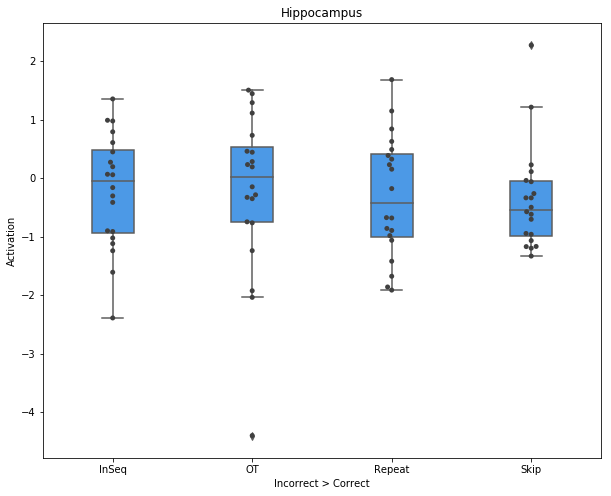

In [9]:
for key in hpc_trials_df:
    print "Mean {0}: ".format(key), np.mean(hpc_trials_df['{0}'.format(key)])
    print "STD {0}: ".format(key), np.std(hpc_trials_df['{0}'.format(key)])
    print "Shapiro's Test of Normality:", stats.shapiro(hpc_trials_df['{0}'.format(key)])
    print "--------"
print "Non-Normal Distribution -- Wilcoxon Signed-Rank"    
print "OT vs. Inseq", stats.wilcoxon(hpc_trials_df['ot'], hpc_trials_df['inseq'])
print "OT vs. Repeat", stats.wilcoxon(hpc_trials_df['ot'], hpc_trials_df['repeat'])
print "OT vs. Skip", stats.wilcoxon(hpc_trials_df['ot'], hpc_trials_df['skip'])
N = 4
conditions = ['InSeq', 'OT', 'Repeat', 'Skip']
mpfc_allsubjs = [hpc_trials_df['inseq'], hpc_trials_df['ot'], 
                 hpc_trials_df['repeat'], hpc_trials_df['skip']]
ind = np.arange(N)
fig, ax = plt.subplots(figsize = (10,8))
ax0 = sns.boxplot(data = mpfc_allsubjs, color = "#3399ff", width = 0.3)
ax2 = sns.swarmplot(data = mpfc_allsubjs, color='.25')
ax.set_xticks(ind)
ax.set_xticklabels(conditions)
ax.set_title("Hippocampus")
ax.set_xlabel("Incorrect > Correct")
ax.set_ylabel("Activation")
plt.show()